In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,NaN,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,NaN
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	6
float64		column 3	12
float64		column 4	2
float64		column 5	6
float64		column 6	6
float64		column 7	2
float64		column 8	6
float64		column 9	12
float64		column 10	4
float64		column 11	4
float64		column 12	8


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,796.000000,794.000000,788.000000,798.000000,794.000000,794.000000,798.000000,794.000000,788.000000,796.000000,796.000000,792.000000
mean,1.510603,1.281819,1.971688,1.930251,1.987804,2.007877,1.961568,2.004331,1.996140,1.984901,1.956998,1.968779
std,2.749679,3.622779,1.142132,1.164763,1.167882,1.142335,1.167410,1.135953,1.145225,1.155401,1.179258,1.126795
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.002230,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.426255,-0.712855,1.020375,0.925905,0.976770,0.990855,0.950823,0.994903,1.057125,1.017250,0.896550,0.998952
50%,0.969530,0.920730,1.965800,1.895400,2.027350,2.009300,1.972050,2.008900,1.988450,1.996300,1.940650,1.956350
75%,3.975200,4.490450,2.900800,2.934325,2.989075,3.011400,2.987475,2.930300,3.007400,2.982000,3.020000,2.883600
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

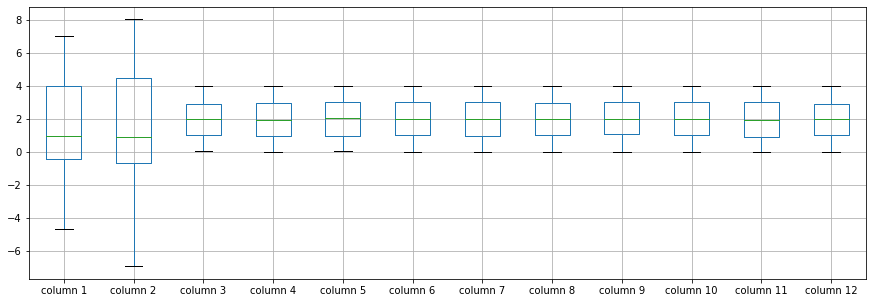

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.510603
column 2     1.281819
column 3     1.971688
column 4     1.930251
column 5     1.987804
column 6     2.007877
column 7     1.961568
column 8     2.004331
column 9     1.996140
column 10    1.984901
column 11    1.956998
column 12    1.968779
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.432880,-0.023027,0.000064,0.032707,0.042619,-0.003913,0.024164,0.004223,0.003942,0.032443,0.020978
column 2,-0.432880,1.000000,-0.016055,-0.021379,-0.032186,-0.016427,0.030358,-0.016715,-0.006977,-0.051704,-0.089314,0.020564
column 3,-0.023027,-0.016055,1.000000,-0.044408,0.082714,0.006414,0.035101,0.007053,0.005038,-0.001499,-0.032453,0.014783
column 4,0.000064,-0.021379,-0.044408,1.000000,0.007276,-0.027981,0.031929,0.038676,-0.035830,0.045386,0.037362,-0.015975
column 5,0.032707,-0.032186,0.082714,0.007276,1.000000,0.050491,0.021962,0.010620,-0.010596,-0.009561,-0.009626,0.008020
column 6,0.042619,-0.016427,0.006414,-0.027981,0.050491,1.000000,-0.071869,0.042171,0.026623,0.010665,-0.033790,0.000332
column 7,-0.003913,0.030358,0.035101,0.031929,0.021962,-0.071869,1.000000,-0.043981,-0.009941,-0.042619,-0.019387,-0.002961
column 8,0.024164,-0.016715,0.007053,0.038676,0.010620,0.042171,-0.043981,1.000000,-0.059834,-0.048088,-0.001443,-0.047915
column 9,0.004223,-0.006977,0.005038,-0.035830,-0.010596,0.026623,-0.009941,-0.059834,1.000000,0.048564,-0.012942,-0.023785
column 10,0.003942,-0.051704,-0.001499,0.045386,-0.009561,0.010665,-0.042619,-0.048088,0.048564,1.000000,-0.066425,0.045284


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+35,12+35+35,12+35+35,12+35+35+35+35,12+35+35+35,12+35+35,12+35,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.373035469055175
Epoch: 1 , loss: 29.16999156951904
Epoch: 2 , loss: 28.838090934753417
Epoch: 3 , loss: 27.53566116333008
Epoch: 4 , loss: 24.08444713592529
Epoch: 5 , loss: 22.860699920654298
Epoch: 6 , loss: 22.38528942108154
Epoch: 7 , loss: 22.061183052062987
Epoch: 8 , loss: 21.576640281677246
Epoch: 9 , loss: 21.057954750061036
Epoch: 10 , loss: 20.87506275177002
Epoch: 11 , loss: 20.867219161987304
Epoch: 12 , loss: 20.833703231811523
Epoch: 13 , loss: 20.633197364807128
Epoch: 14 , loss: 20.306259078979494
Epoch: 15 , loss: 20.17306827545166
Epoch: 16 , loss: 20.289545593261717
Epoch: 17 , loss: 20.31502166748047
Epoch: 18 , loss: 20.019283142089844
Epoch: 19 , loss: 20.085170669555666
Epoch: 20 , loss: 19.905958786010743
Epoch: 21 , loss: 19.832292976379396
Epoch: 22 , loss: 19.982836647033693
Epoch: 23 , loss: 20.017508964538575
Epoch: 24 , loss: 19.985298728942873
Epoch: 25 , loss: 19.707

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    1.501336
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
796,0.0,0.0,-1.83903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028629
797,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
798,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(18.284584871279552, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.07366222278348108

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,1.261370,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.255329
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NE_1(imp).xlsx", index=False, header=False)